In [13]:
# Alp Sunol, 6/1/2020, 
# Script for analysis of constant strain viscosity of translation voxels
import numpy as np
#Enter in parameters and dimensions:
r_rib = 0.01305; # radius in um
r_tern = 0.0059;
r_crowd = 0.002;

dr = [0.6, 1, 1.5, 2, 2.5, 3]; # doubling rates
vox = np.array([0.1008553156299825, 0.09292614340673645, 0.08424111219214989,
       0.07738620566244644, 0.07199644075126958, 0.06767802200013741]); # original voxel sizes
n_rib = np.array([3.5431368807732677, 7.83939708791492, 9.053235633635463,
         8.728526590655443, 8.013776336457527, 7.258097524079424]); # number of ribosomes in a translation voxel
n_tern = 42; # number of ternary complexes
n_crowd = np.array([1970.0, 2096.0, 1791.0, 1418.0, 1090.0, 820.0]); # crowders
n_tot = n_rib + n_tern + n_crowd; # total molecules
phi = (4/3)*np.pi*(n_rib*r_rib**3 + n_tern*r_tern**3 + n_crowd*r_crowd**3)/(vox**3); # volume fractions across doubling rates
phi_rib = (4/3)*np.pi*(n_rib*r_rib**3)/(vox**3); # volume fraction of each species (ribosome)
phi_tern = (4/3)*np.pi*(n_tern*r_tern**3)/(vox**3); # volume fraction of ternary complexes
phi_crowd = (4/3)*np.pi*(n_crowd*r_crowd**3)/(vox**3); # volume fraction of crowders

mult = 100; # increase system size by this much to get better stats
vox_new = (mult**(1/3))*(vox/r_rib/2); # new voxel sizes
n_rib_new = mult*n_rib; # new total number, these were rounded to nearest 1 in simulation
n_tern_new = mult*n_tern;
n_crowd_new = mult*n_crowd;
n_tot_new = mult*n_tot;

# Size ratios:
ratio_3 = r_rib/r_crowd;
ratio_2 = r_rib/r_tern;

# LAMMPS Stress output:
stress_poly = [0.30687505, 1.2353882, 2.5700916,  3.8343913, 5.0503564,  5.8327729];

In [14]:
#Scale the LAMMPS stress output such that it is equivilant to a monodispersed
#case of size ribosomes.  Note in LAMMPS documentation, viscosity, and
#herefore off diagonal stress, scales with the size squared:
#(https://lammps.sandia.gov/doc/units.html)
stress_poly_adjusted = n_tot_new*stress_poly/(n_rib_new + (ratio_2**2)*n_tern_new + (ratio_3**2)*n_crowd_new) 

# Convert to Brownian dynamics units from Foss and Brady 2000:
strain_rate = 1; # in D/(2a)^2 (LAMMPS units)
Pe_1 = strain_rate/4;  #peclet number, noting that strain is defined in 
                       # diameter for lammps but we converted to radius.
                       # Note that this is 1/4 for the ribosome, but
                       # 1/4/ratio_2^3 and 1/4/ratio_3^3 for the crowders,
                       # meaning the peclet number for the whole suspension
                       # is very low, meaning our system is close to
                       # equilibirum.
sigma_poly = stress_poly_adjusted/8; # in a^3/kT, with a being ribosome radius
visc_poly_p = sigma_poly*6*np.pi/Pe_1; # interparticle contribution to viscosity
visc_poly = 1 + (5/2)*phi + visc_poly_p; # final normalized viscosity

In [15]:
visc_poly

array([1.39863657, 1.83806931, 2.33803169, 2.76564579, 3.15041649,
       3.41838736])

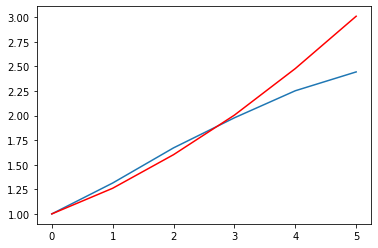

In [41]:
%matplotlib inline
monodisperse = np.array([1.37769311250437,          1.73718706235011,          2.20769189898426,
          2.76172691958858,          3.41403512049185,          4.14715796024852])/(1.37769311250437)
import matplotlib.pyplot as plt
plt.plot(visc_poly/visc_poly[0])
plt.plot(monodisperse,color='red')


In [27]:
visc_poly/visc_poly[0]

array([1.        , 1.3141865 , 1.67165062, 1.97738701, 2.25249114,
       2.44408549])

In [28]:
monodisperse

array([1.        , 1.26093906, 1.6024555 , 2.0046024 , 2.478081  ,
       3.01021898])

In [32]:
phi_list = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
       0.42317604])
a = []
for i in phi_list:
    a.append(1+2.5*i+6.2*i**2)

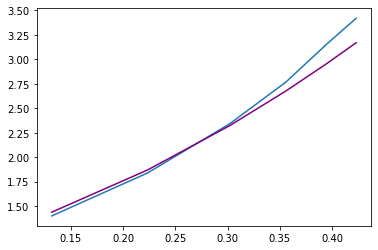

In [35]:
plt.plot(phi_list,visc_poly)
plt.plot(phi_list,a,color='purple')

In [36]:
visc_poly

array([1.39863657, 1.83806931, 2.33803169, 2.76564579, 3.15041649,
       3.41838736])

In [40]:
monodisperse

array([1.37769311, 1.73718706, 2.2076919 , 2.76172692, 3.41403512,
       4.14715796])